In [ ]:
# @title Tải dữ liệu
from google.colab import files
uploaded = files.upload()

Saving DataScience_salaries_2024.csv to DataScience_salaries_2024.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import io
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.ticker as ticker
from matplotlib.patches import Patch


from sklearn.datasets import fetch_kddcup99
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler , LabelEncoder

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


from yellowbrick.cluster import KElbowVisualizer


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib




**ĐỌC DỮ LIỆU TỪ TỆP**

In [ ]:
# Đọc dữ liệu từ tệp banking.txt và tạo DataFrame
df = pd.read_csv("DataScience_salaries_2024.csv", delimiter=",")
print(df)

# Custom color palette
custom_colors = ['#D496A7','#edafb8', '#f7e1d7', '#dedbd2', '#b0c4b1', '#8AA399','#4a5759']
sns.color_palette(custom_colors)

       work_year experience_level employment_type  \
0           2021               MI              FT   
1           2021               MI              FT   
2           2020               MI              FT   
3           2021               MI              FT   
4           2022               SE              FT   
...          ...              ...             ...   
14833       2022               MI              FT   
14834       2020               EX              FT   
14835       2021               EN              FT   
14836       2022               EN              FT   
14837       2020               EN              PT   

                             job_title salary_currency  salary_in_usd  \
0                       Data Scientist             CLP          40038   
1                      BI Data Analyst             HUF          36259   
2                       Data Scientist             HUF          35735   
3                          ML Engineer             JPY          77364  

[(0.8313725490196079, 0.5882352941176471, 0.6549019607843137),
 (0.9294117647058824, 0.6862745098039216, 0.7215686274509804),
 (0.9686274509803922, 0.8823529411764706, 0.8431372549019608),
 (0.8705882352941177, 0.8588235294117647, 0.8235294117647058),
 (0.6901960784313725, 0.7686274509803922, 0.6941176470588235),
 (0.5411764705882353, 0.6392156862745098, 0.6),
 (0.2901960784313726, 0.3411764705882353, 0.34901960784313724)]

**Mô tả thông tin cơ bản về bộ dữ liệu**

In [ ]:
print('Basic Information about the Dataset:\n')
print('- There are {} observations and {} features in this dataset. \n'.format(df.shape[0],df.shape[1]))

print('- There are {} unique Job Titles in this dataset such as {}... \n'.format(len(df.job_title.unique()),
                                                                           ', '.join(df.job_title.unique()[0:3])))

print('- There are {} experience levels in this dataset such as {}.\n'.format(len(df.experience_level.unique()),
                                                                              ', '.join(df.experience_level.unique()[::])))
print('- There are {} employment types in this dataset such as {}.\n'.format(len(df.employment_type.unique()),
                                                                              ', '.join(df.employment_type.unique()[::])))

print('- There are {} company locations, and {} employee residence countries. \n'.format(len(df.company_location.unique()),
                                                                                       len(df.employee_residence.unique())))
print('- There are {} company sizes such as {}. \n'.format(len(df.company_size.unique()),
                                                          ', '.join(df.company_size.unique())))
print('- Annual salary in USD varies form {} to {}'.format(df.salary_in_usd.min(), df.salary_in_usd.max()))

Basic Information about the Dataset:

- There are 14838 observations and 11 features in this dataset. 

- There are 153 unique Job Titles in this dataset such as Data Scientist, BI Data Analyst, ML Engineer... 

- There are 4 experience levels in this dataset such as MI, SE, EN, EX.

- There are 4 employment types in this dataset such as FT, FL, CT, PT.

- There are 77 company locations, and 88 employee residence countries. 

- There are 3 company sizes such as L, S, M. 

- Annual salary in USD varies form 15000 to 800000


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary_currency     14838 non-null  object
 5   salary_in_usd       14838 non-null  int64 
 6   employee_residence  14838 non-null  object
 7   remote_ratio        14838 non-null  int64 
 8   company_location    14838 non-null  object
 9   company_size        14838 non-null  object
 10  salary              14838 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


Text(0.5, 1.0, 'Missing Values')

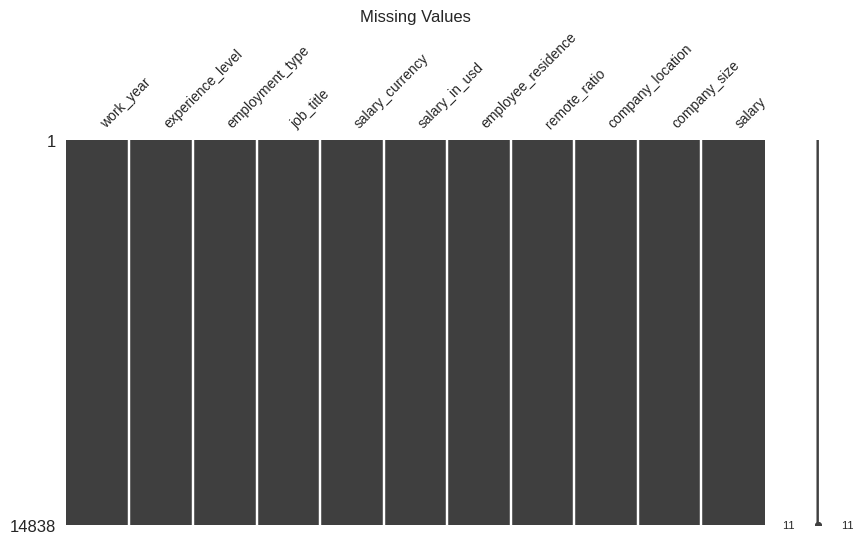

In [ ]:
# Check for missing values
msno.matrix(df, figsize=(10, 5), fontsize=10)
plt.title('Missing Values',fontsize=12)

In [ ]:
df['job_title'].value_counts().head(15)

,count
job_title,
Data Engineer,3162
Data Scientist,3015
Data Analyst,2189
Machine Learning Engineer,1542
Research Scientist,475
Analytics Engineer,403
Applied Scientist,383
Data Architect,369
Research Engineer,276


In [ ]:
df[df['job_title'].str.match('^Data Scien', case=True)]['job_title'].unique()

array(['Data Scientist', 'Data Science Manager',
       'Data Science Consultant', 'Data Science',
       'Data Science Tech Lead', 'Data Science Lead',
       'Data Science Engineer', 'Data Science Director',
       'Data Science Practitioner', 'Data Scientist Lead',
       'Data Science Analyst'], dtype=object)

In [ ]:
# Checking for unique values
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
# Checking for unique values
df['employment_type'].unique()

array(['FT', 'FL', 'CT', 'PT'], dtype=object)

**XỬ LÝ DỮ LIỆU LIÊN TỤC**

In [ ]:
# Chọn các cột có kiểu dữ liệu số
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric)

# Kiểm tra giá trị khuyết
print(df_numeric.isnull().sum())

       work_year  salary_in_usd  remote_ratio    salary
0           2021          40038           100  30400000
1           2021          36259            50  11000000
2           2020          35735            50  11000000
3           2021          77364            50   8500000
4           2022          95386            50   7500000
...          ...            ...           ...       ...
14833       2022          15000           100     15000
14834       2020          15000             0     15000
14835       2021          15000           100     15000
14836       2022          15000             0     15000
14837       2020          15966           100     14000

[14838 rows x 4 columns]
work_year        0
salary_in_usd    0
remote_ratio     0
salary           0
dtype: int64


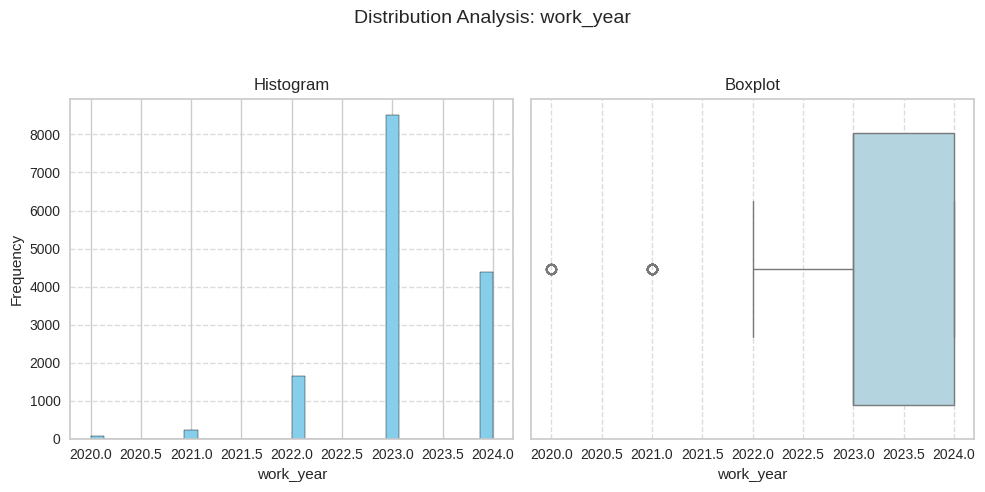

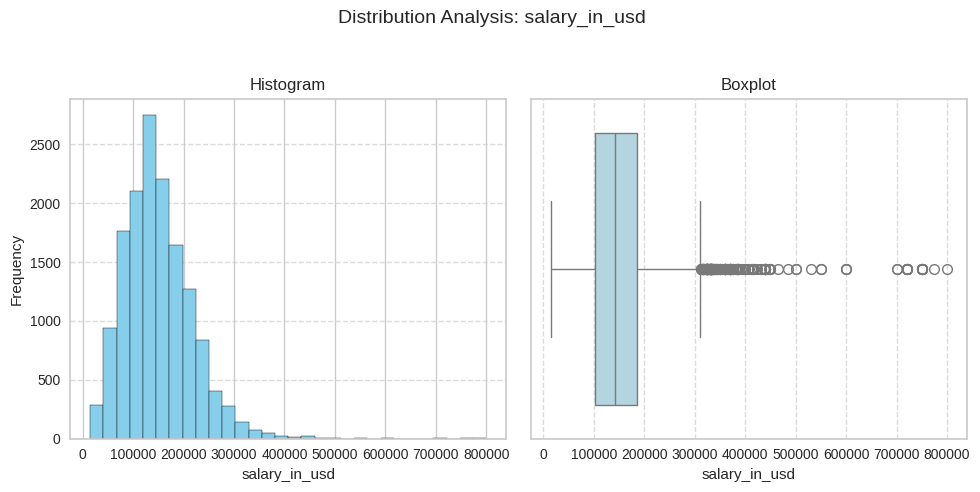

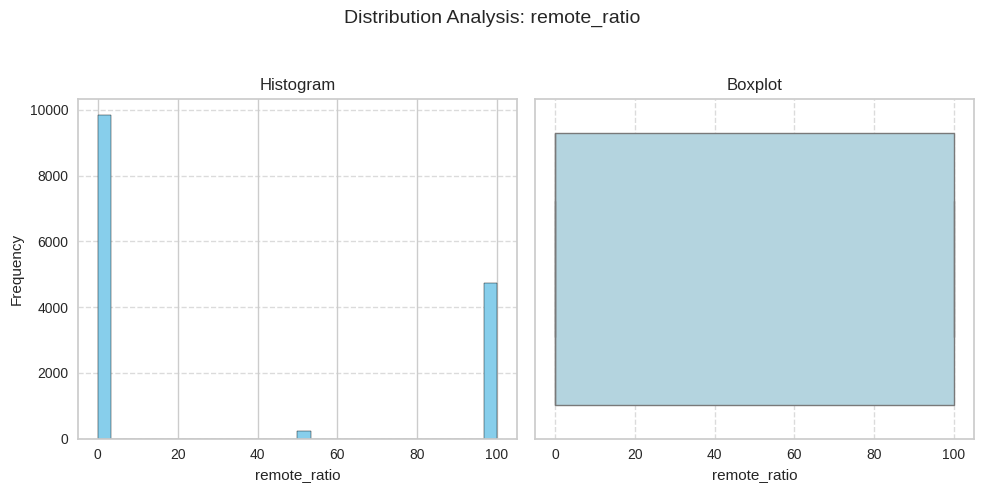

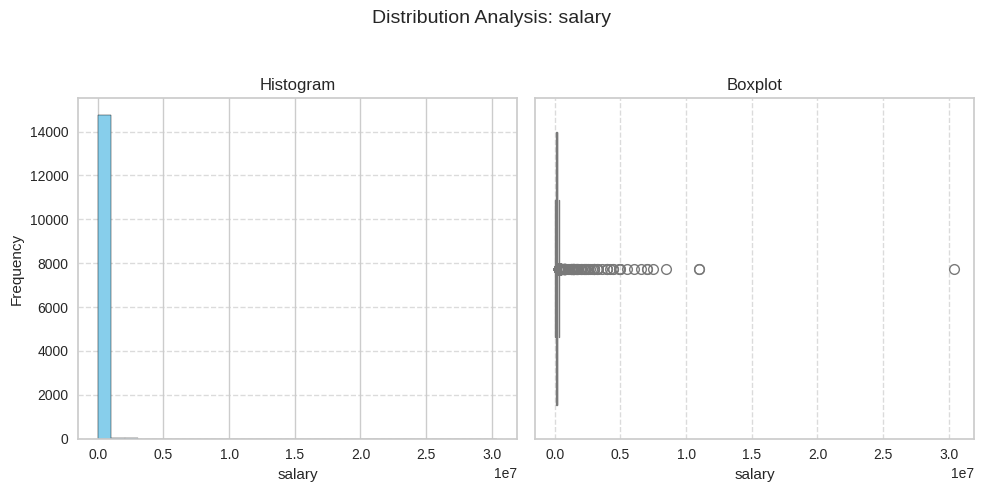

In [ ]:
# Biểu đồ Histogram
for column in df_numeric.columns:
    # Tạo figure và 2 biểu đồ bên cạnh nhau
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 hàng, 2 cột
    fig.suptitle(f'Distribution Analysis: {column}', fontsize=14)

    # Vẽ Histogram (bên trái) Hiển thị phân phối tổng thể của dữ liệu.
    axes[0].hist(df_numeric[column], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title('Histogram')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Vẽ Boxplot (bên phải) Giúp phát hiện ngoại lệ và hiểu về phân phối.
    sns.boxplot(x=df_numeric[column], ax=axes[1], color='lightblue')
    axes[1].set_title('Boxplot')
    axes[1].set_xlabel(column)
    axes[1].grid(axis='x', linestyle='--', alpha=0.7)

    # Hiển thị biểu đồ
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Căn chỉnh để tránh chồng lấn tiêu đề
    plt.show()

In [ ]:
# Điền giá trị khuyết bằng mode (giá trị phổ biến nhất)
df['work_year'] = df['work_year'].fillna(df['work_year'].mode()[0])

# Điền giá trị khuyết bằng trung vị
df['salary_in_usd'] = df['salary_in_usd'].fillna(df['salary_in_usd'].median())


In [ ]:
# Tao bang thong ke
data_describe = df_numeric.describe(include='all')
print(data_describe)

          work_year  salary_in_usd  remote_ratio        salary
count  14838.000000   14838.000000  14838.000000  1.483800e+04
mean    2023.138900  149874.718763     32.760480  1.650227e+05
std        0.700799   69009.181349     46.488278  3.562354e+05
min     2020.000000   15000.000000      0.000000  1.400000e+04
25%     2023.000000  102000.000000      0.000000  1.021000e+05
50%     2023.000000  141300.000000      0.000000  1.422000e+05
75%     2024.000000  185900.000000    100.000000  1.875000e+05
max     2024.000000  800000.000000    100.000000  3.040000e+07


In [ ]:
# Dữ liệu số cần chuẩn hóa
numeric_cols = ['work_year', 'salary_in_usd', 'remote_ratio', 'salary']  # Các cột muốn chuẩn hóa

# Khởi tạo Min-Max Scaler
scaler = MinMaxScaler()

# Áp dụng Min-Max Scaler
df_min_max_normalized = df_numeric.copy()
df_min_max_normalized[numeric_cols] = scaler.fit_transform(df_numeric[numeric_cols])

# Hiển thị dữ liệu sau chuẩn hóa
print("Dữ liệu sau chuẩn hóa:")
print(df_min_max_normalized)

Dữ liệu sau chuẩn hóa:
       work_year  salary_in_usd  remote_ratio    salary
0           0.25       0.031896           1.0  1.000000
1           0.25       0.027082           0.5  0.361548
2           0.00       0.026414           0.5  0.361548
3           0.25       0.079445           0.5  0.279273
4           0.50       0.102403           0.5  0.246363
...          ...            ...           ...       ...
14833       0.50       0.000000           1.0  0.000033
14834       0.00       0.000000           0.0  0.000033
14835       0.25       0.000000           1.0  0.000033
14836       0.50       0.000000           0.0  0.000033
14837       0.00       0.001231           1.0  0.000000

[14838 rows x 4 columns]


In [ ]:
 # Dữ liệu số cần chuẩn hóa
numeric_cols = ['work_year', 'salary_in_usd', 'remote_ratio', 'salary']  # Các cột muốn chuẩn hóa

# Khởi tạo Standard Scaler
scaler = StandardScaler()

# Áp dụng Standard Scaler
df_standardized = df_numeric.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df_numeric[numeric_cols])

# Hiển thị dữ liệu sau chuẩn hóa
print("Dữ liệu sau chuẩn hóa (Standard Scaling):")
print(df_standardized)


Dữ liệu sau chuẩn hóa (Standard Scaling):
       work_year  salary_in_usd  remote_ratio     salary
0      -3.052193      -1.591678      1.446425  84.876444
1      -3.052193      -1.646441      0.370848  30.416241
2      -4.479184      -1.654034      0.370848  30.416241
3      -3.052193      -1.050776      0.370848  23.398173
4      -1.625201      -0.789613      0.370848  20.590946
...          ...            ...           ...        ...
14833  -1.625201      -1.954512      1.446425  -0.421148
14834  -4.479184      -1.954512     -0.704728  -0.421148
14835  -3.052193      -1.954512      1.446425  -0.421148
14836  -1.625201      -1.954512     -0.704728  -0.421148
14837  -4.479184      -1.940513      1.446425  -0.423955

[14838 rows x 4 columns]


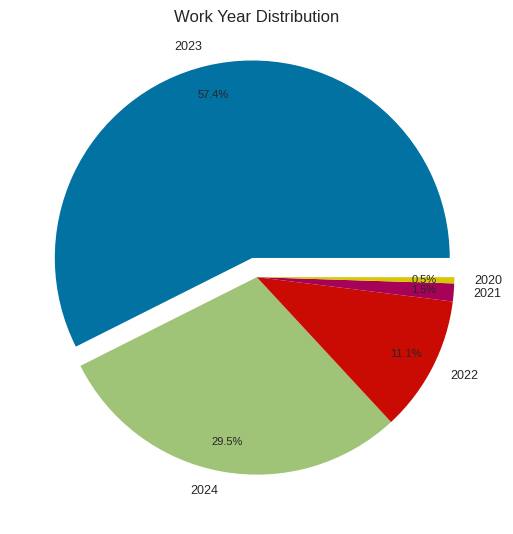

In [ ]:
work_year_counts = df['work_year'].value_counts(normalize=True)

fig, ax = plt.subplots()

# Create an explode list to emphasize the wedge with the highest count (0.1 for the highest count)
explode = [0.1 if i == work_year_counts.idxmax() else 0 for i in work_year_counts.index]

# Create the pie chart with the specified parameters
wedges, texts, autotexts = ax.pie(work_year_counts.values,
                                  labels=work_year_counts.index,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,# Move percentage labels slightly outward from default
                                  labeldistance=1.1,
                                  explode=explode)

plt.title('Work Year Distribution')
# Set properties for the percentage labels (autotexts)
plt.setp(autotexts, size=8)

# Set properties for the text labels (texts)
plt.setp(texts, size=9)

plt.tight_layout()
plt.show()

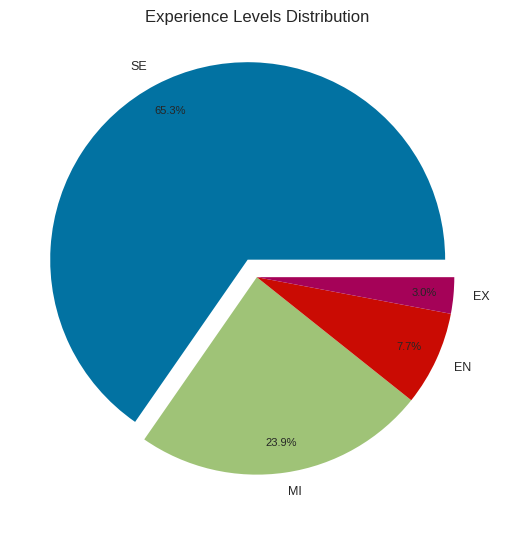

In [ ]:
# Get the count of each experience level
experience_counts = df['experience_level'].value_counts(normalize=True)

# Create a figure with a specific size
fig, ax = plt.subplots()

# Create an explode list to emphasize the wedge with the highest count (0.1 for the highest count)
explode = [0.1 if i == experience_counts.idxmax() else 0 for i in experience_counts.index]

# Create the pie chart with the specified parameters
wedges, texts, autotexts = ax.pie(experience_counts.values,
                                  labels=experience_counts.index,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,# Move percentage labels slightly outward from default
                                  labeldistance=1.1,
                                  explode=explode)

plt.title('Experience Levels Distribution')
# Set properties for the percentage labels (autotexts)
plt.setp(autotexts, size=8)

# Set properties for the text labels (texts)
plt.setp(texts, size=9)

plt.tight_layout()
plt.show()

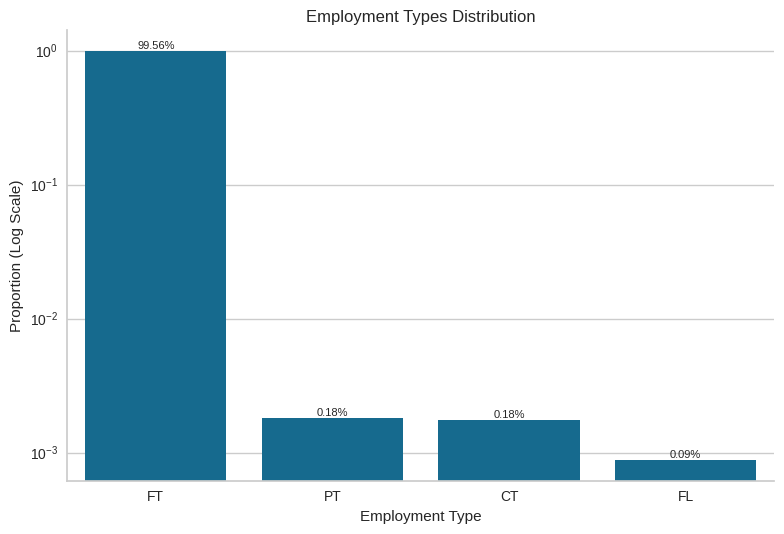

In [ ]:
# Calculate normalized counts of employment types
emp_type_counts = df['employment_type'].value_counts(normalize=True)

# Create a figure
plt.figure()

# Create a barplot
ax = sns.barplot(x=emp_type_counts.index, y=emp_type_counts.values)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Employment Types Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Proportion (Log Scale)')

# Add percentage labels to the bars
for idx, val in enumerate(emp_type_counts.values):
    ax.text(idx, val, f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

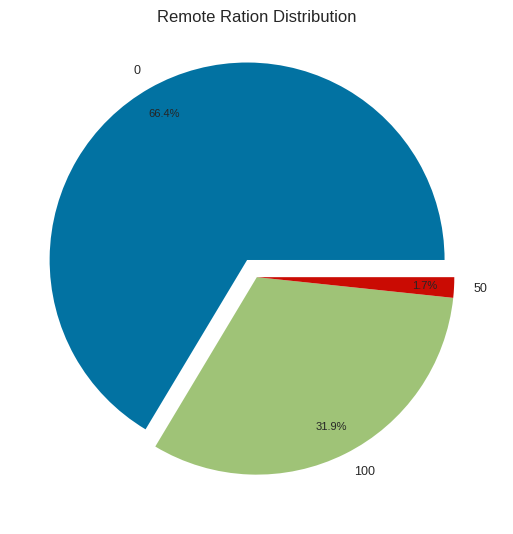

In [ ]:
# Get the count of each type of remote_ratio
remote_counts = df['remote_ratio'].value_counts(normalize=True)

# Create a figure
fig, ax = plt.subplots()

# Create an explode list to emphasize the wedge with the highest count (0.1 for the highest count)
explode = [0.1 if i == remote_counts.idxmax() else 0 for i in remote_counts.index]

# Create the pie chart with the specified parameters
wedges, texts, autotexts = ax.pie(remote_counts.values,
                                  labels=remote_counts.index,
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,# Move percentage labels slightly outward from default
                                  labeldistance=1.1,
                                  explode=explode)

plt.title('Remote Ration Distribution')
# Set properties for the percentage labels (autotexts)
plt.setp(autotexts, size=8)

# Set properties for the text labels (texts)
plt.setp(texts, size=9)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate number of respondents for eac
comp_size_data_count = df['company_size'].value_counts().reindex(['S', 'M', 'L']).reset_index()

# Print the Number of Respondents by Company Size using .itertuples()
print(f'Number of Respondents by Company Size:\n' +
      '\n'.join(f' - {size}: {count}' for size, count in comp_size_data_count.itertuples(index=False)))

Number of Respondents by Company Size:
 - S: 181
 - M: 13674
 - L: 983


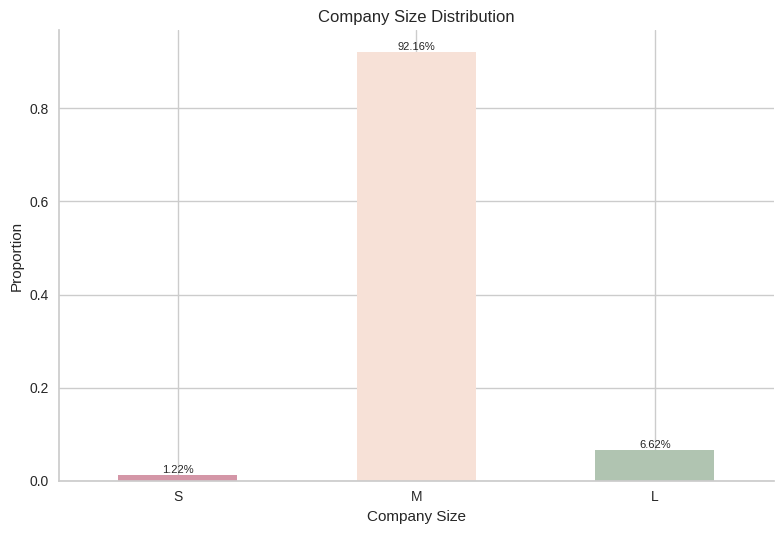

In [ ]:
# Prepare data for plotting
comp_size_data = df['company_size'].value_counts(normalize=True).reindex(['S', 'M', 'L'])

# Create the figure
fig, ax = plt.subplots()

# Create the plot
comp_size_data.plot(kind='bar', color=custom_colors[::2], ax=ax)

# Modify the properties of the plot
ax.set(xlabel='Company Size', ylabel='Proportion', title='Company Size Distribution')

# Rotate x-axis labels
plt.xticks(rotation=0)

# Add percentage labels to the bars
for idx, val in enumerate(comp_size_data.values):
    plt.text(idx, val, f'{val:.2%}', ha='center', va='bottom', fontsize=8)

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
top_5_titles = (df['job_title'].value_counts().nlargest(5).index).tolist()

# Join the list elements into a string separated by commas
top_5_titles_str = '\n'.join(top_5_titles)

print(f'Top 5 Job Titles are: \n{top_5_titles_str}')

Top 5 Job Titles are: 
Data Engineer
Data Scientist
Data Analyst
Machine Learning Engineer
Research Scientist


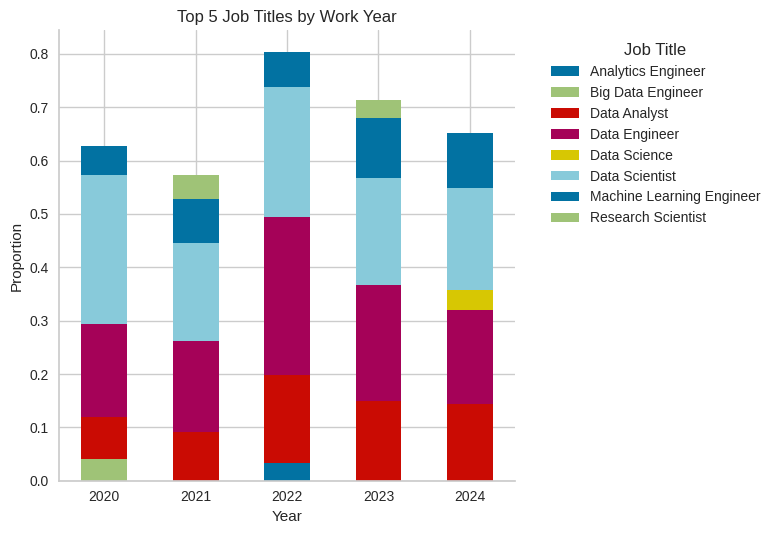

In [ ]:
# Calculate normalized counts of job titles per year
title_counts = df.groupby('work_year')['job_title'].value_counts(normalize=True).rename('percentage').reset_index()

# Get top 5 titles for each year independently
top_titles_per_year = (title_counts.sort_values(['work_year', 'percentage'], ascending=[True, False])
                       .groupby('work_year')
                       .head(5)
                       .reset_index(drop=True))

# Pivot the data to create a matrix suitable for stacked bar chart
pivot_data = top_titles_per_year.pivot(index='work_year', columns='job_title', values='percentage').fillna(0)

# Create a stacked bar plot
plt.figure()
ax = pivot_data.plot(kind='bar', stacked=True, ax=plt.gca())

# Modify the properties of the plot
ax.set(xlabel='Year', ylabel='Proportion', title='Top 5 Job Titles by Work Year')

plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

# Remove the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

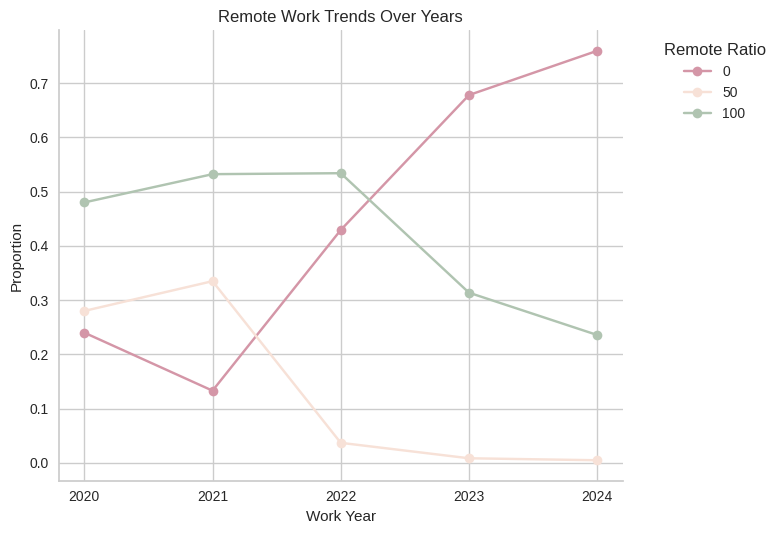

In [ ]:
# Select colors from the custom palette with a step of 2
plot_colors = custom_colors[::2]

# Create a figure
fig, ax = plt.subplots()

# Data preparation and plotting
df.groupby('work_year')['remote_ratio'].value_counts(normalize=True).unstack(fill_value=0).plot(kind='line', marker='o', color=plot_colors, ax=ax)

# Customize the plot
ax.set(xlabel='Work Year', ylabel='Proportion', title='Remote Work Trends Over Years')

# Ensure x-axis shows all years
plt.xticks(df['work_year'].unique())
plt.legend(title='Remote Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

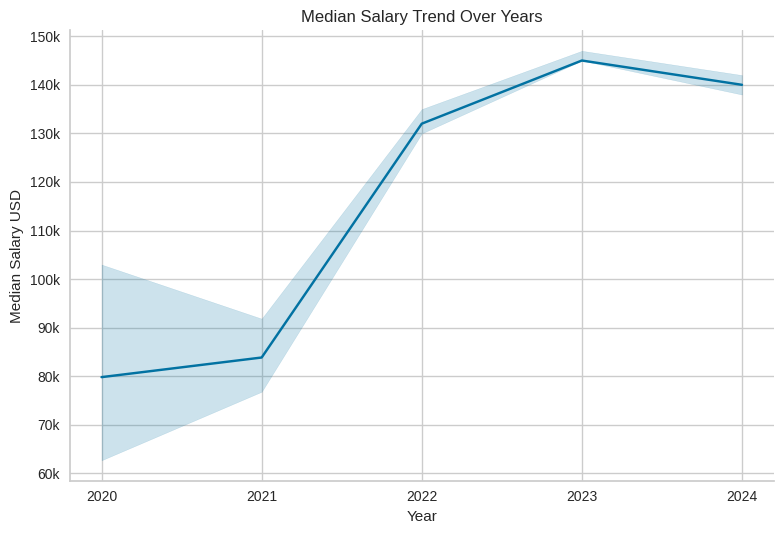

In [ ]:
# Create figure and axes
fig, ax = plt.subplots()

# Create a lineplot
sns.lineplot(data=df, x='work_year', y='salary_in_usd', estimator='median', errorbar=('ci', 95), ax=ax)

# Modify the properties of the plot
ax.set(xlabel='Year', ylabel='Median Salary USD', title='Median Salary Trend Over Years')

# Ensure x-axis shows all years
plt.xticks(df['work_year'].unique())

# Remove the top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Format x-axis labels and set tick locations
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}k'))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10000))

plt.tight_layout()
plt.show()

<ipython-input-39-c62c2caca5d3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_job_titles, x='salary_in_usd', y='job_title', palette=custom_colors, ax=ax)
<ipython-input-39-c62c2caca5d3>:8: UserWarning: 
The palette list has fewer values (7) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_15_job_titles, x='salary_in_usd', y='job_title', palette=custom_colors, ax=ax)


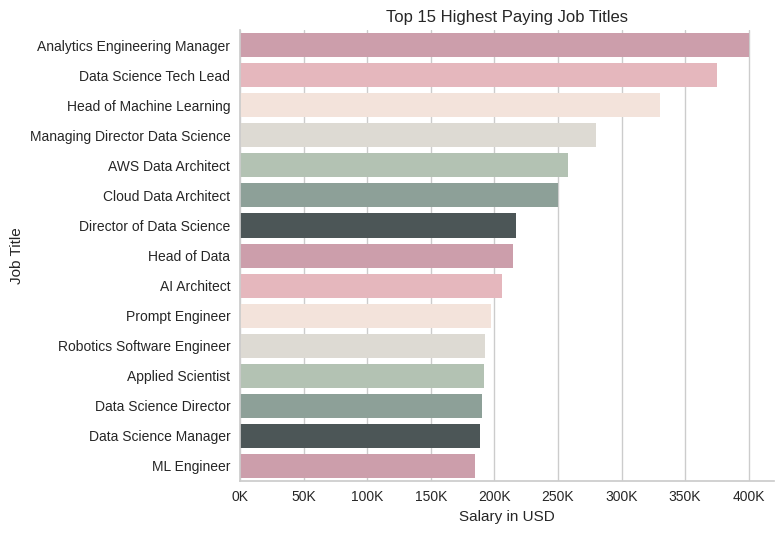

In [ ]:
# Calculate the Top 15 median salaries
top_15_job_titles = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False).head(15).reset_index()

# Create figure and axes
fig, ax = plt.subplots()

# Create the bar plot with hue
sns.barplot(data=top_15_job_titles, x='salary_in_usd', y='job_title', palette=custom_colors, ax=ax)

# Customize the plot
ax.set(xlabel='Salary in USD', ylabel='Job Title', title='Top 15 Highest Paying Job Titles')

# Format x-axis labels and set tick locations
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(50000))

# Remove the top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Adjust the subplot layout
plt.tight_layout()

plt.show()